## Digit Identification (Handwritten) on MNIST dataset using KNN 

In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df=pd.read_csv('train.csv')

In [45]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
print(df.shape)
print(df.columns)

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [47]:
d=df.values

In [48]:
x=d[:,1:]
y=d[:,0]
print(x.shape,y.shape)

(42000, 784) (42000,)


In [49]:
print(x,"\n\n",y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

 [1 0 1 ... 7 6 9]


In [50]:
#train test split.
#SPLIT THE Dataset into testing and training data using the 80 20 split
split=int(0.8*x.shape[0])


In [51]:
xtrain=x[:split,:]
ytrain =y [: split]

In [52]:
xtest=x[split:,:]
ytest=y[split:]

In [53]:
print(xtest.shape, ytest.shape)

(8400, 784) (8400,)


In [54]:
#VISUALISING SOME SAMPLES
def drawImg(sample):
    #RESAPE 
    img=sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

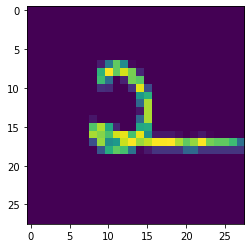

2


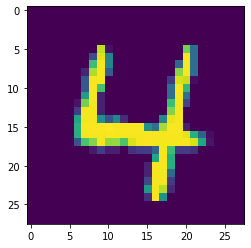

4


In [55]:
drawImg(xtrain[55])
print(ytrain[55])
drawImg(xtrain[42])
print(ytrain[42])

## applying knn algorithm

In [57]:
#distance formula
def distance(x1,x2):
    return np.sqrt(sum(x1-x2)**2)

#KNN ALGO
def knn(x,y,querypoint,k=5):
    #pick the k nearest neighbours
    
    vals=[]
    for i in range(x.shape[0]):
        #compute the distances 
        d=distance(querypoint,x[i])
        vals.append((d,y[i]))
        
    #print(vals)
    # sort the vals
    vals=sorted(vals)
    vals=vals[:k]
    
    vals=np.array(vals)
    new_v = np.unique(vals[:,1],return_counts=True)
    print(new_v)
    
    index = new_v[1].argmax()
    pred = new_v[0][index]
    
    return pred
    
    

In [ ]:
#testing over test data
pred=knn(xtrain,ytrain,xtest[12])
print(pred)   #our prediction
drawImg(xtest[12]) #image
print(ytest[12])  #actual answer

# Computing accuracy

In [ ]:
total_test=len(ytest)
total_test

count =float(0)
for i in range(total_test):
    if(knn(xtrain,ytrain,xtest[i])==ytest[i]):
        count+=1
accu=(count/total_test)

In [ ]:
accu*100